<a href="https://colab.research.google.com/github/Gltknzk/1-PROJECTS/blob/main/Tree_Types_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

#### *ii. Load Dataset*

In [186]:
df = pd.read_csv("treetypes.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.0,2748.505160,418.300975,1859.0,2375.0,2753.0,3108.0,3857.0
Aspect,250000.0,156.212172,109.652847,0.0,65.0,125.0,260.0,360.0
Slope,250000.0,16.331052,8.317490,0.0,10.0,15.0,22.0,65.0
Horizontal_Distance_To_Hydrology,250000.0,228.094032,209.630153,0.0,66.0,180.0,330.0,1390.0
Vertical_Distance_To_Hydrology,250000.0,50.897820,61.006967,-163.0,5.0,32.0,79.0,598.0
Horizontal_Distance_To_Roadways,250000.0,1719.966576,1330.817603,0.0,756.0,1318.0,2294.0,7112.0
Hillshade_9am,250000.0,212.370488,30.654582,0.0,195.0,220.0,235.0,254.0
Hillshade_Noon,250000.0,218.510700,22.680947,0.0,206.0,222.0,235.0,254.0
Hillshade_3pm,250000.0,134.502764,46.033892,0.0,106.0,137.0,167.0,252.0
Horizontal_Distance_To_Fire_Points,250000.0,1521.756904,1107.378373,0.0,734.0,1273.0,1998.0,7150.0


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

***
***

## 2.  Data Cleaning

In [189]:
df.isnull().sum().sum()

0

In [190]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type'], dtype='object')

In [191]:
df.Elevation.value_counts()

2326    313
2305    300
2952    293
2304    292
2330    287
       ... 
3663      1
3646      1
3676      1
3842      1
1863      1
Name: Elevation, Length: 1983, dtype: int64

In [192]:
df.Aspect.value_counts()

45     1450
90     1372
63     1239
135    1172
117    1172
108    1169
72     1141
62     1140
61     1139
111    1129
113    1124
114    1124
122    1123
101    1118
103    1114
102    1113
56     1108
54     1108
93     1105
27     1104
107    1098
88     1096
81     1088
105    1088
94     1087
80     1085
58     1084
86     1083
100    1077
18     1077
83     1071
53     1071
112    1069
36     1068
0      1068
67     1067
84     1067
79     1066
59     1063
92     1059
104    1058
66     1055
82     1054
106    1053
121    1052
342    1046
87     1041
60     1041
99     1038
85     1034
315    1034
76     1027
110    1019
57     1016
51     1016
91     1015
98     1014
96     1013
333    1009
75     1007
129    1007
74     1007
69     1006
23     1006
52     1003
31     1001
119    1001
115    1001
95      998
118     996
120     994
65      992
70      990
34      989
68      987
39      987
109     983
49      982
25      979
97      974
28      974
73      972
89      972
124 

In [193]:
df.Slope.value_counts()

10    12315
11    12268
12    11892
13    11885
15    11401
14    11276
9     11190
16    10733
8     10422
17    10043
18     9791
7      9289
19     9016
20     8401
6      8141
21     8077
22     7607
23     6919
5      6588
24     6284
25     6060
26     5462
4      5149
27     4984
28     4534
29     4023
30     3587
3      3545
31     3334
32     2716
33     2232
2      2140
34     1874
35     1489
36     1160
37      908
1       859
38      630
39      452
40      332
41      241
42      147
0       142
43      134
45       81
44       75
46       40
49       36
48       31
47       30
50       17
53        4
52        4
51        3
56        2
65        2
60        1
55        1
57        1
Name: Slope, dtype: int64

In [194]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type'], dtype='object')

In [195]:
df['Horizontal_Distance_To_Hydrology'].value_counts()

0       19997
30      11045
60       4374
150      4316
67       2893
        ...  
1275        1
1281        1
1332        1
1324        1
1247        1
Name: Horizontal_Distance_To_Hydrology, Length: 1294, dtype: int64

In [196]:
df['Vertical_Distance_To_Hydrology'].value_counts()

 0      28435
 1       3928
 3       3802
 4       3706
 2       3519
 5       3370
 6       3317
 7       3139
 8       2876
 10      2865
 9       2744
 13      2603
 11      2463
 12      2439
 14      2386
 16      2339
 20      2272
 17      2219
 23      2212
 15      2198
 19      2141
-1       2095
 18      2084
 22      2011
 26      2007
 21      2007
 24      1904
 27      1849
 29      1845
 25      1826
 33      1818
-2       1814
 30      1807
 31      1779
 36      1779
 28      1775
 32      1765
 39      1699
 34      1692
 40      1655
 37      1634
 42      1604
 43      1583
 35      1568
 38      1554
 41      1530
 46      1529
 49      1442
 47      1427
-3       1421
 53      1404
 52      1397
 48      1386
 45      1355
 44      1353
 50      1347
 59      1346
 55      1320
 51      1305
 56      1294
 62      1271
 54      1270
 58      1251
 57      1239
 60      1210
 61      1210
 63      1209
 66      1182
-4       1179
 69      1160
 64      1127
 65   

In [197]:
df['Horizontal_Distance_To_Roadways'].value_counts()

150     563
120     404
390     370
240     360
300     360
       ... 
6634      1
6760      1
6400      1
6815      1
6747      1
Name: Horizontal_Distance_To_Roadways, Length: 6501, dtype: int64

In [198]:
df['Hillshade_9am'].value_counts()

230    4284
226    4266
228    4254
224    4117
231    4050
227    4015
229    4000
223    3961
225    3940
233    3938
222    3925
232    3920
234    3900
235    3816
221    3702
238    3669
237    3657
236    3626
240    3520
218    3516
220    3483
242    3444
219    3441
243    3420
241    3384
253    3379
239    3369
216    3298
249    3295
217    3259
250    3240
252    3208
244    3146
247    3086
248    3081
245    3073
246    3057
215    3039
251    3037
213    2916
214    2875
211    2740
212    2730
210    2612
207    2556
209    2552
208    2547
205    2329
206    2279
202    2268
201    2252
204    2229
203    2181
200    2174
199    2162
198    2113
196    2101
195    2091
197    2079
194    1975
193    1893
192    1848
190    1841
254    1825
191    1784
189    1679
188    1633
187    1614
186    1548
185    1519
184    1452
182    1429
183    1353
181    1333
180    1287
175    1250
179    1200
177    1180
176    1178
178    1151
173    1069
174    1050
172     992
170 

In [199]:
df['Hillshade_Noon'].value_counts()

225    5239
223    5199
228    5092
224    5082
226    5042
227    5000
229    4998
230    4887
222    4876
231    4835
221    4833
232    4657
218    4653
220    4577
233    4553
219    4539
217    4473
215    4378
234    4291
216    4279
214    4138
236    4012
213    3926
235    3827
212    3690
211    3678
237    3593
238    3501
210    3491
239    3454
244    3439
245    3431
246    3419
242    3404
247    3396
241    3362
243    3291
209    3266
240    3207
208    3153
207    3152
206    3119
248    3085
249    3015
250    2912
205    2887
251    2874
204    2712
252    2631
203    2616
202    2512
201    2292
199    2168
200    2087
253    2027
198    2008
197    1997
196    1980
195    1631
194    1602
193    1538
191    1431
192    1430
254    1383
190    1347
188    1333
189    1293
187    1267
186    1183
185    1125
183    1078
184    1033
182     893
181     891
179     844
180     834
178     825
176     754
177     736
175     697
174     668
171     640
172     635
173 

In [200]:
df['Hillshade_3pm'].value_counts()

138    2505
142    2494
143    2487
135    2464
140    2456
132    2454
145    2444
136    2417
146    2385
141    2382
139    2351
134    2350
137    2346
144    2312
149    2279
129    2247
133    2244
128    2242
131    2218
148    2184
124    2180
150    2132
130    2124
125    2122
126    2093
147    2076
121    2075
127    2065
120    2006
163    2000
117    1999
166    1980
152    1974
159    1952
161    1942
162    1937
123    1936
151    1934
122    1928
153    1919
165    1899
118    1885
154    1878
119    1871
156    1865
160    1855
158    1850
155    1847
164    1819
157    1806
115    1795
114    1788
110    1755
167    1742
116    1741
113    1729
169    1728
112    1718
170    1714
175    1710
173    1708
172    1695
109    1646
168    1642
111    1628
176    1612
171    1594
107    1583
181    1577
182    1574
179    1563
180    1560
108    1550
178    1541
177    1530
174    1525
106    1516
105    1445
103    1444
104    1428
184    1421
183    1383
99     1380
186 

In [201]:
df['Wilderness_Area_1'].value_counts()

0    190425
1     59575
Name: Wilderness_Area_1, dtype: int64

In [202]:
df['Wilderness_Area_2'].value_counts()

0    241660
1      8340
Name: Wilderness_Area_2, dtype: int64

In [203]:
df['Wilderness_Area_3'].value_counts()

0    145544
1    104456
Name: Wilderness_Area_3, dtype: int64

In [204]:
df['Wilderness_Area_4'].value_counts()

0    172827
1     77173
Name: Wilderness_Area_4, dtype: int64

In [205]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type'], dtype='object')

In [206]:
df['Soil_Type_1'].value_counts()

0    245414
1      4586
Name: Soil_Type_1, dtype: int64

In [207]:
df.Cover_Type.value_counts()

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [208]:
df.isnull().sum().sum()

0

In [209]:
df2=df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', "Cover_Type"]]

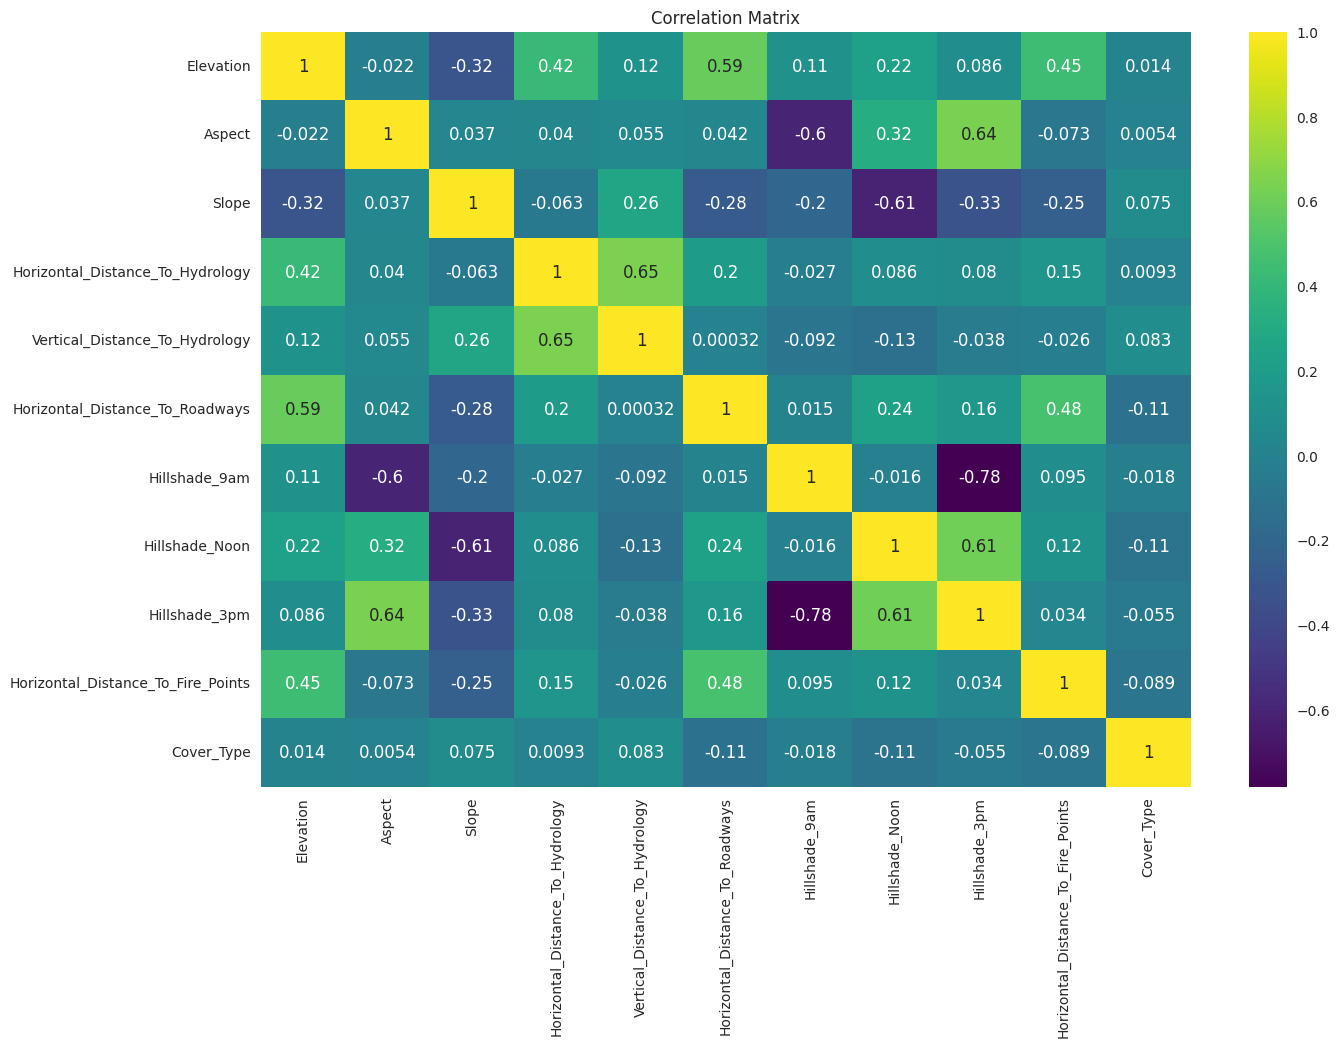

In [210]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [211]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type'], dtype='object')

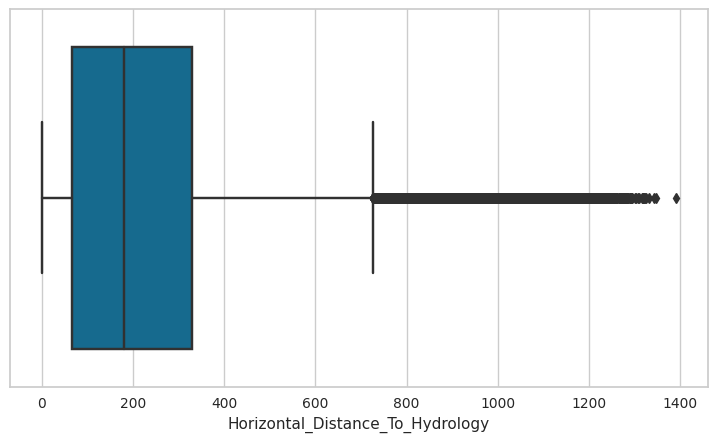

In [212]:
sns.boxplot(df['Horizontal_Distance_To_Hydrology'])

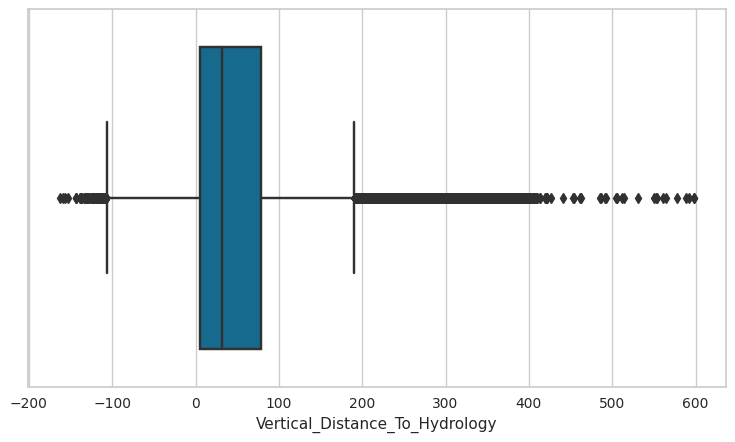

In [213]:
sns.boxplot(df['Vertical_Distance_To_Hydrology'])

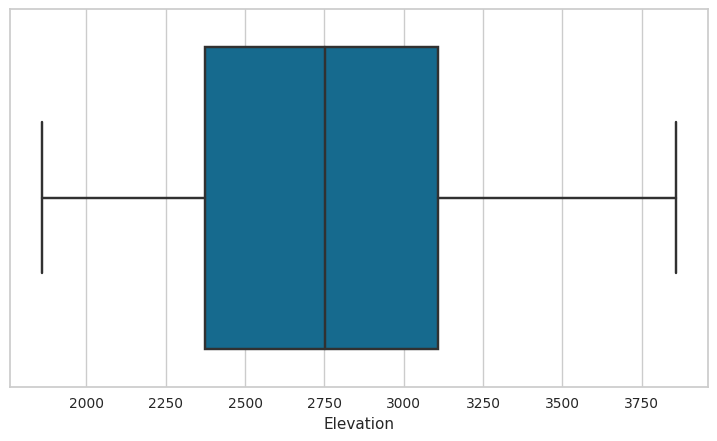

In [214]:
sns.boxplot(df.Elevation)

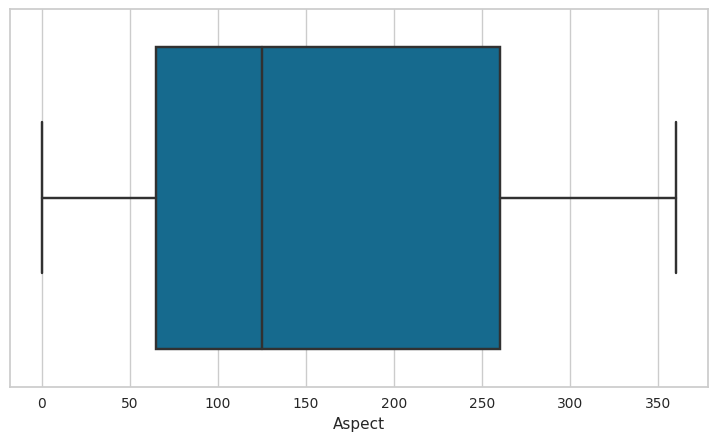

In [215]:
sns.boxplot(df.Aspect)

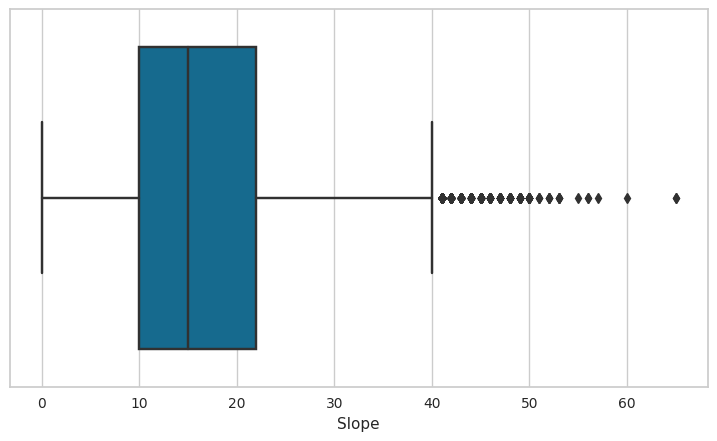

In [216]:
sns.boxplot(df.Slope)

In [217]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type'], dtype='object')

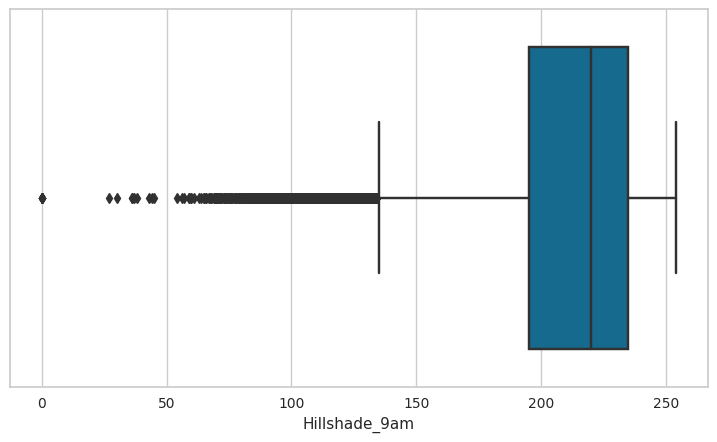

In [218]:
sns.boxplot(df['Hillshade_9am'])

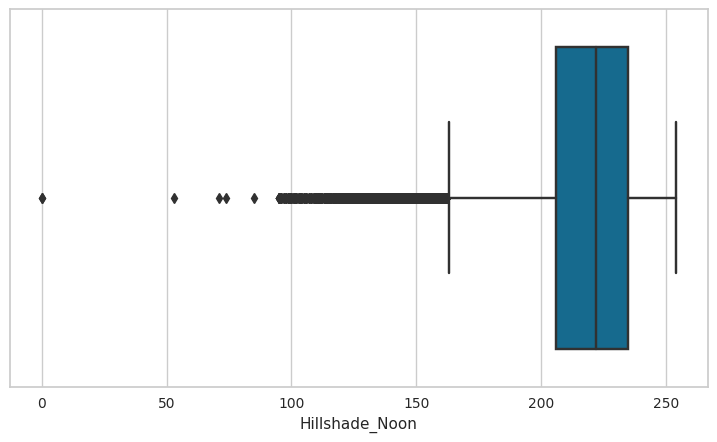

In [219]:
sns.boxplot(df['Hillshade_Noon'])

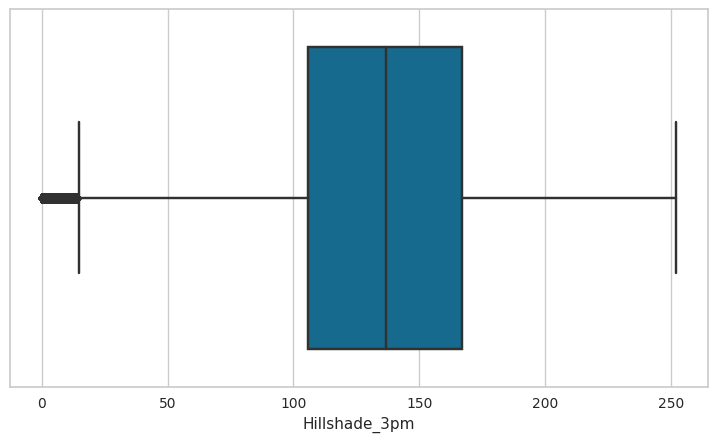

In [220]:
sns.boxplot(df['Hillshade_3pm'])

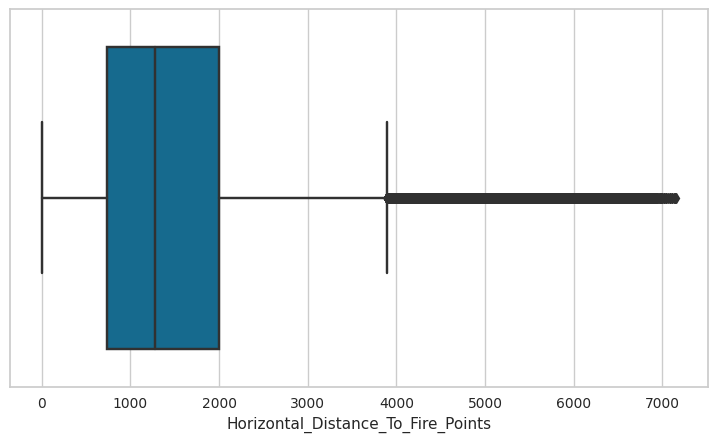

In [221]:
sns.boxplot(df['Horizontal_Distance_To_Fire_Points'])

### Deal with Outliers

#### *ii. Drop Outliers*

In [222]:
def detect_outliers(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [223]:
df = df[(df['Slope'] > detect_outliers(df, 'Slope')[0]) &
              (df['Slope'] < detect_outliers(df, 'Slope')[1])]
df.shape

(249997, 55)

In [224]:
df = df[(df['Horizontal_Distance_To_Hydrology'] > detect_outliers(df, 'Horizontal_Distance_To_Hydrology')[0]) &
              (df['Horizontal_Distance_To_Hydrology'] < detect_outliers(df, 'Horizontal_Distance_To_Hydrology')[1])]
df.shape

(249255, 55)

In [225]:
df = df[(df['Vertical_Distance_To_Hydrology'] > detect_outliers(df, 'Vertical_Distance_To_Hydrology')[0]) &
              (df['Vertical_Distance_To_Hydrology'] < detect_outliers(df, 'Vertical_Distance_To_Hydrology')[1])]
df.shape

(248471, 55)

In [226]:
df = df[(df['Hillshade_9am'] > detect_outliers(df, 'Hillshade_9am')[0]) &
              (df['Hillshade_9am'] < detect_outliers(df, 'Hillshade_9am')[1])]
df.shape

(248344, 55)

In [227]:
df = df[(df['Hillshade_Noon'] > detect_outliers(df, 'Hillshade_Noon')[0]) &
              (df['Hillshade_Noon'] < detect_outliers(df, 'Hillshade_Noon')[1])]
df.shape

(248141, 55)

In [228]:
df = df[(df['Horizontal_Distance_To_Fire_Points'] > detect_outliers(df, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (df['Horizontal_Distance_To_Fire_Points'] < detect_outliers(df, 'Horizontal_Distance_To_Fire_Points')[1])]
df.shape

(245686, 55)

In [229]:
numeric = []

for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [230]:
for col in numeric:
    if detect_outliers(df, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(df, col)[2], col))

There are 160 outliers in Horizontal_Distance_To_Hydrology
There are 54 outliers in Horizontal_Distance_To_Roadways
There are 277 outliers in Horizontal_Distance_To_Fire_Points


In [231]:
df.shape

(245686, 55)

### Now, let's take a closer look at correlation of continuous columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [233]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=59)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [235]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [236]:
modelSVM = LinearSVC()

In [237]:
modelSVM.fit(X_train_scaled , y_train)

LinearSVC()

In [238]:
y_pred_test = modelSVM.predict(X_test_scaled)
y_pred_train = modelSVM.predict(X_train_scaled)

In [239]:
def eval_metric(modelSVM, X_train, y_train, X_test, y_test):
    y_train_pred = modelSVM.predict(X_train)
    y_pred = modelSVM.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

TEST REPORT
              precision    recall  f1-score   support

           1       0.63      0.65      0.64     10499
           2       0.60      0.47      0.53     10326
           3       0.61      0.51      0.56     10453
           4       0.78      0.90      0.84     10715
           5       0.62      0.71      0.66     10551
           6       0.58      0.58      0.58     10714
           7       0.87      0.89      0.88     10448

    accuracy                           0.68     73706
   macro avg       0.67      0.67      0.67     73706
weighted avg       0.67      0.68      0.67     73706




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.63      0.66      0.65     24618
           2       0.59      0.46      0.52     23866
           3       0.61      0.51      0.55     24813
           4       0.78      0.91      0.84     24814
           5       0.63      0.71      0.6

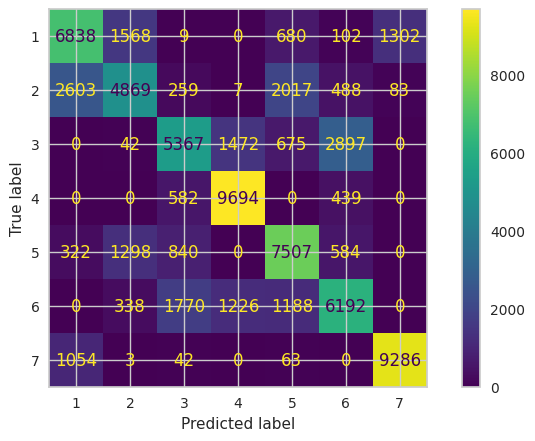

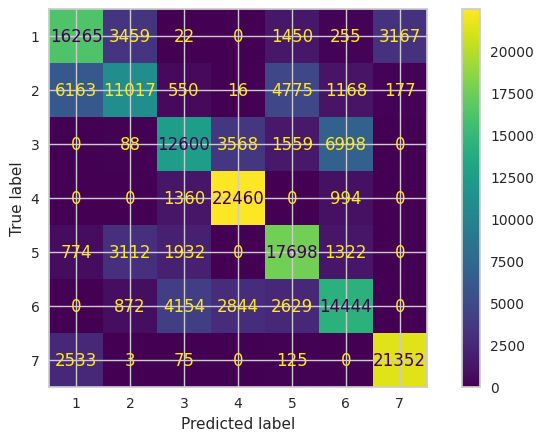

In [240]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(modelSVM, X_test_scaled, y_test);

print("\n"*3, "-*"*30)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(modelSVM, X_train_scaled, y_train);

In [279]:
param_grid = {
    'base_estimator__C': np.linspace(0.01,1, 3),
}

In [ ]:
from sklearn.model_selection import GridSearchCV
model = BaggingClassifier(SVC(kernel="linear"), n_jobs=-1, max_samples=.1,n_estimators=5,random_state=6)
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="f1_macro",
                              n_jobs=-1)

svm_model_grid.fit(X_train_scaled, y_train)

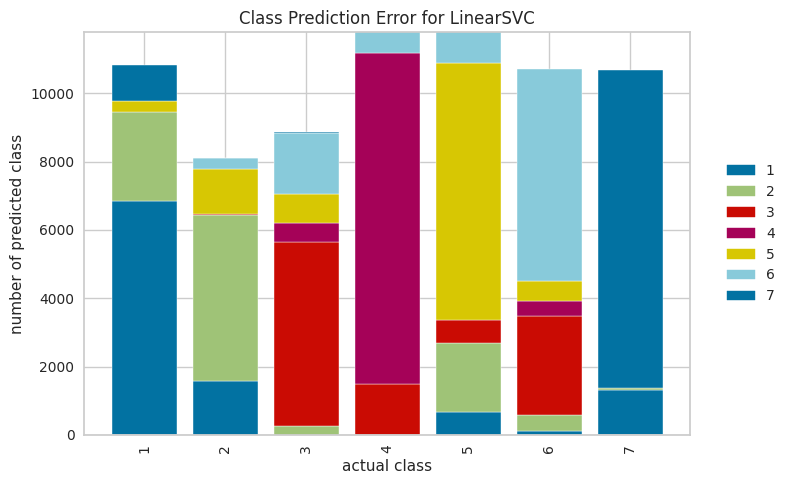

In [284]:
from yellowbrick.classifier import ClassPredictionError


visualizer = ClassPredictionError(modelSVM)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

In [ ]:
visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [242]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
DT_model = DecisionTreeClassifier(random_state=101)

In [244]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [245]:
y_pred = DT_model.predict(X_test)

In [246]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [247]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

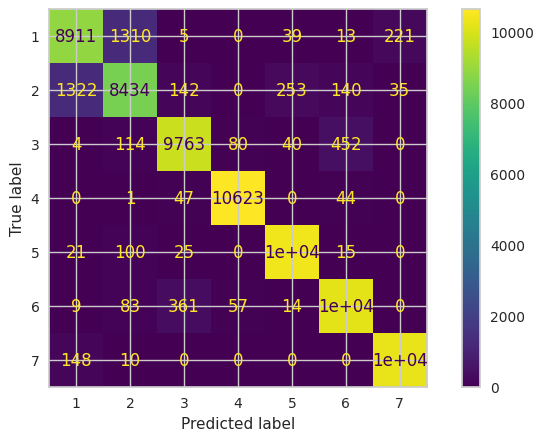

In [248]:
plot_confusion_matrix(DT_model,X_test,y_test)

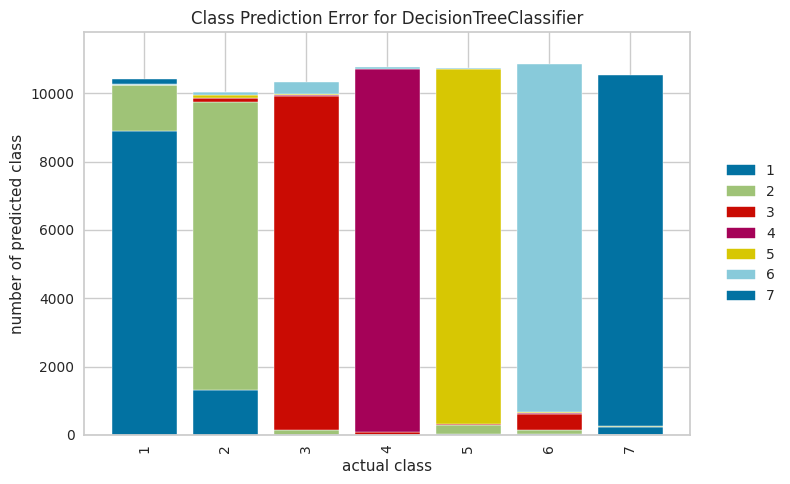

In [249]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [250]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 8911  1310     5     0    39    13   221]
 [ 1322  8434   142     0   253   140    35]
 [    4   114  9763    80    40   452     0]
 [    0     1    47 10623     0    44     0]
 [   21   100    25     0 10390    15     0]
 [    9    83   361    57    14 10190     0]
 [  148    10     0     0     0     0 10290]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.85     10499
           2       0.84      0.82      0.83     10326
           3       0.94      0.93      0.94     10453
           4       0.99      0.99      0.99     10715
           5       0.97      0.98      0.98     10551
           6       0.94      0.95      0.94     10714
           7       0.98      0.98      0.98     10448

    accuracy                           0.93     73706
   macro avg       0.93      0.93      0.93     73706
weighted avg       0.93      0.93      0.93     73706


Train_Set
[[24618     0     0     0     0     0     0]
 [    0 23866     0   

In [251]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [252]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.858645,0.040757,0.928073,0.928073,0.928073,0.928073
2,2.921131,0.039466,0.928422,0.928422,0.928422,0.928422
3,2.884266,0.041761,0.926503,0.926503,0.926503,0.926503
4,2.782789,0.038428,0.928189,0.928189,0.928189,0.928189
5,2.816951,0.046604,0.926968,0.926968,0.926968,0.926968
6,5.188060,0.075456,0.929120,0.929120,0.929120,0.929120
7,6.078812,0.110584,0.925863,0.925863,0.925863,0.925863
8,3.561861,0.042263,0.926910,0.926910,0.926910,0.926910
9,2.852124,0.040950,0.931329,0.931329,0.931329,0.931329
10,2.865031,0.039704,0.927375,0.927375,0.927375,0.927375


In [253]:
df_scores.mean()[2:]

test_accuracy           0.927875
test_precision_micro    0.927875
test_recall_micro       0.927875
test_f1_micro           0.927875
dtype: float64

In [254]:
DT_model.feature_importances_

array([4.16137548e-01, 2.70246820e-02, 1.47906858e-02, 6.39244113e-02,
       3.62456573e-02, 1.03464096e-01, 3.05545338e-02, 2.60381419e-02,
       1.75341260e-02, 1.01660095e-01, 1.29485068e-02, 1.65068507e-03,
       9.25301529e-03, 8.22766349e-03, 1.06504181e-03, 4.55327338e-03,
       1.63659762e-02, 1.80535086e-02, 9.52000528e-04, 3.46716079e-03,
       0.00000000e+00, 0.00000000e+00, 5.06806721e-05, 3.54540707e-02,
       2.16470472e-03, 4.94755711e-03, 1.93222632e-03, 3.57180017e-04,
       0.00000000e+00, 3.75372627e-04, 1.51683522e-03, 2.59813460e-05,
       2.49146142e-04, 1.89085111e-03, 1.48201541e-04, 3.06768756e-03,
       2.57617816e-03, 2.34781828e-03, 3.22172197e-05, 7.62868951e-04,
       1.76761623e-04, 2.25170174e-04, 5.34723818e-03, 2.32241987e-03,
       3.21354984e-03, 3.52712586e-03, 2.57517939e-03, 7.58411870e-05,
       1.08296746e-03, 2.41073674e-05, 0.00000000e+00, 3.61044443e-03,
       5.74725463e-03, 2.61552973e-04])

In [255]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance",ascending=False)
df_f_i

,Feature Importance
Elevation,0.416138
Horizontal_Distance_To_Roadways,0.103464
Horizontal_Distance_To_Fire_Points,0.101660
Horizontal_Distance_To_Hydrology,0.063924
Vertical_Distance_To_Hydrology,0.036246
Soil_Type_10,0.035454
Hillshade_9am,0.030555
Aspect,0.027025
Hillshade_Noon,0.026038
Soil_Type_4,0.018054


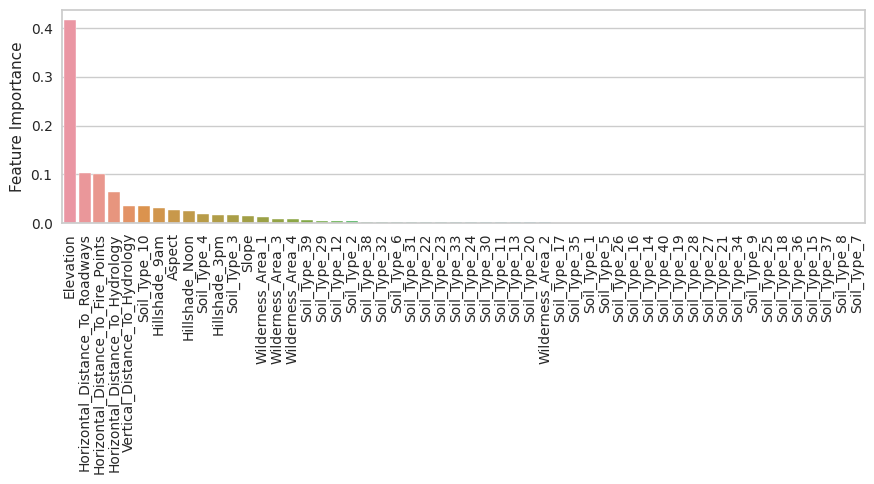

In [256]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [257]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [258]:
from sklearn.ensemble import RandomForestClassifier

In [259]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9439   848     2     0    45     8   157]
 [  853  8974   152     1   179   148    19]
 [    1    13 10042    97    20   280     0]
 [    0     0     9 10703     0     3     0]
 [    0    18    10     0 10516     7     0]
 [    1     7   125    61     4 10516     0]
 [   32     1     0     0     3     0 10412]]
              precision    recall  f1-score   support

           1       0.91      0.90      0.91     10499
           2       0.91      0.87      0.89     10326
           3       0.97      0.96      0.97     10453
           4       0.99      1.00      0.99     10715
           5       0.98      1.00      0.99     10551
           6       0.96      0.98      0.97     10714
           7       0.98      1.00      0.99     10448

    accuracy                           0.96     73706
   macro avg       0.96      0.96      0.96     73706
weighted avg       0.96      0.96      0.96     73706


Train_Set
[[24618     0     0     0     0     0     0]
 [    0 23866     0   

In [260]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.957146
test_precision_micro    0.957146
test_recall_micro       0.957146
test_f1_micro           0.957146
dtype: float64

In [286]:
#Grid Search for Random Forest
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }

In [ ]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [288]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

XGBClassifier(objective='multi:softprob')

TEST REPORT
              precision    recall  f1-score   support

           1       0.63      0.65      0.64     10499
           2       0.60      0.47      0.53     10326
           3       0.61      0.51      0.56     10453
           4       0.78      0.90      0.84     10715
           5       0.62      0.71      0.66     10551
           6       0.58      0.58      0.58     10714
           7       0.87      0.89      0.88     10448

    accuracy                           0.68     73706
   macro avg       0.67      0.67      0.67     73706
weighted avg       0.67      0.68      0.67     73706




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.63      0.66      0.65     24618
           2       0.59      0.46      0.52     23866
           3       0.61      0.51      0.55     24813
           4       0.78      0.91      0.84     24814
           5       0.63      0.71      0.6

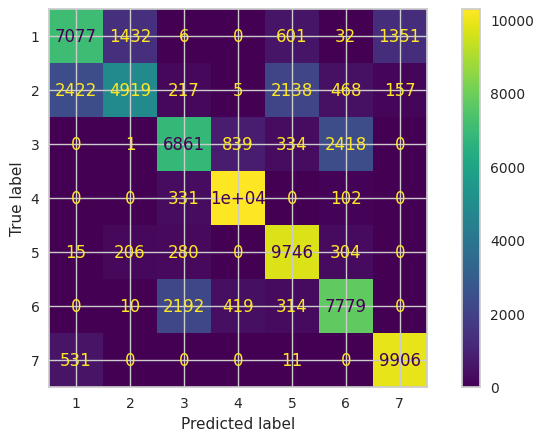

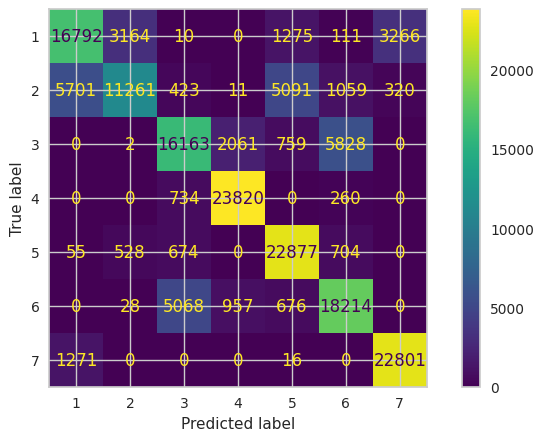

In [289]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_classifier, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(xgb_classifier, X_train, y_train);

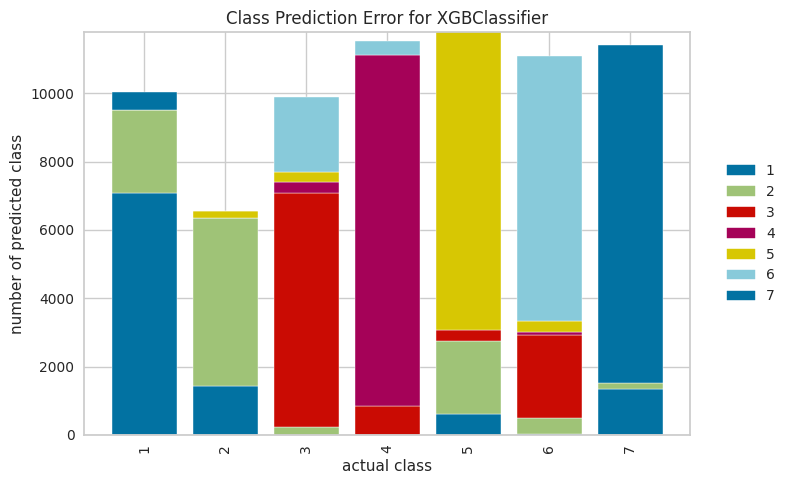

In [290]:
visualizer = ClassPredictionError(xgb_classifier)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()



### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___